In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#Change to your npy dir path
print(os.listdir("C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/lung_datasets(full301cases)/"))

['0001_NI000_slice000.npy', '0001_NI000_slice001.npy', '0001_NI000_slice002.npy', '0001_NI000_slice003.npy', '0001_NI000_slice004.npy', '0001_NI000_slice005.npy', '0001_NI000_slice006.npy', '0001_NI000_slice007.npy', '0002_NI000_slice000.npy', '0002_NI000_slice001.npy', '0002_NI000_slice002.npy', '0002_NI000_slice003.npy', '0002_NI000_slice004.npy', '0002_NI000_slice005.npy', '0002_NI000_slice006.npy', '0002_NI000_slice007.npy', '0002_NI000_slice008.npy', '0002_NI000_slice009.npy', '0002_NI000_slice010.npy', '0002_NI000_slice011.npy', '0002_NI000_slice012.npy', '0002_NI000_slice013.npy', '0002_NI000_slice014.npy', '0002_NI000_slice015.npy', '0002_NI000_slice016.npy', '0002_NI000_slice017.npy', '0002_NI000_slice018.npy', '0002_NI000_slice019.npy', '0002_NI000_slice020.npy', '0002_NI000_slice021.npy', '0002_NI000_slice022.npy', '0002_NI000_slice023.npy', '0002_NI000_slice024.npy', '0002_NI000_slice025.npy', '0002_NI000_slice026.npy', '0002_NI000_slice027.npy', '0003_NI000_slice000.npy', 

In [5]:
import tensorflow
import tensorflow.keras as K
from tensorflow.keras.layers import Conv2D
import tqdm
import os
import cv2
import random
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [7]:
import glob
num_classes=3
#load the image data
#Change to your npy dir path
path = 'C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/lung_datasets(full301cases)/'

trainImages = []
for i in os.listdir(path):
    data = np.load(path+i,allow_pickle=True) 
    data = np.resize(data,(224,224,3))
    trainImages.append(data)
        
trainImages=np.asarray(trainImages)
trainImages.shape
#trainImages.reshape(-1,224,224,3)

(7374, 224, 224, 3)

In [8]:
import pandas as pd
import numpy as np

#Change to your csv dir path
path= "C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/meta_info(full301cases).csv"
df = pd.read_csv(path)

In [9]:
label_data=pd.Series(df['is_cancer'])
label_data

0            TRUE
1            TRUE
2            TRUE
3            TRUE
4            TRUE
          ...    
7369    Ambiguous
7370    Ambiguous
7371    Ambiguous
7372    Ambiguous
7373    Ambiguous
Name: is_cancer, Length: 7374, dtype: object

In [10]:
lb=LabelBinarizer()
label_data=lb.fit_transform(label_data)

In [11]:
#Split the train dataset
X_train,X_test,Y_train,Y_test=train_test_split(trainImages,label_data,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5899, 224, 224, 3) (1475, 224, 224, 3)
(5899, 3) (1475, 3)


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

#Loading VGG16 model
size = K.Input(shape=(224,224,3))
vgg16_model = VGG16(weights="imagenet", include_top=False, input_tensor=size)
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
vggmodel = K.models.Sequential()
vggmodel.add(vgg16_model)
vggmodel.add(K.layers.Flatten())
vggmodel.add(K.layers.Dense(128, activation='relu'))
vggmodel.add(K.layers.Dense(64, activation='relu'))
vggmodel.add(K.layers.Dense(3, activation='softmax'))

vggmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 17,934,531
Trainable params: 17,934,531
Non-trainable params: 0
_________________________________________________________________


In [10]:
vggmodel.compile(optimizer=K.optimizers.Adam(learning_rate=0.0001), loss=K.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
vgg_history = vggmodel.fit(X_train, Y_train,batch_size=16, validation_split=0.2, verbose=1, epochs=30)

Epoch 1/30


c:\Users\PC\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\backend.py:4869: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


295/295 [==============================] - 62s 179ms/step - loss: 0.8847 - accuracy: 0.5982 - val_loss: 0.8746 - val_accuracy: 0.6364
Epoch 2/30
295/295 [==============================] - 44s 149ms/step - loss: 0.8488 - accuracy: 0.6073 - val_loss: 0.7959 - val_accuracy: 0.6458
Epoch 3/30
295/295 [==============================] - 48s 162ms/step - loss: 0.8203 - accuracy: 0.6190 - val_loss: 0.7751 - val_accuracy: 0.6500
Epoch 4/30
295/295 [==============================] - 48s 161ms/step - loss: 0.7936 - accuracy: 0.6275 - val_loss: 0.7907 - val_accuracy: 0.6466
Epoch 5/30
295/295 [==============================] - 48s 163ms/step - loss: 0.7879 - accuracy: 0.6306 - val_loss: 0.7702 - val_accuracy: 0.6576
Epoch 6/30
295/295 [==============================] - 48s 163ms/step - loss: 0.7681 - accuracy: 0.6313 - val_loss: 0.7334 - val_accuracy: 0.6619
Epoch 7/30
295/295 [==============================] - 48s 164ms/step - loss: 0.7428 - accuracy: 0.6648 - val_loss: 0.6854 - val_accuracy: 0.6

In [12]:
vggmodel.save('pretrainedvgg.h5')

In [12]:
vggmodel=K.models.load_model('pretrainedvgg.h5')

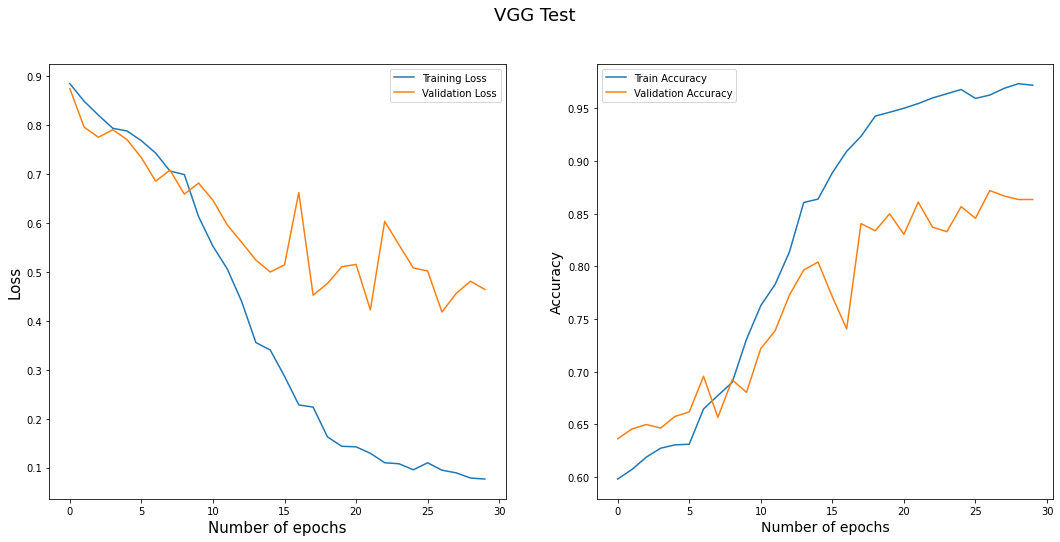

In [13]:
plt.figure(figsize=(18,8))

plt.suptitle('VGG Test', fontsize=18)

plt.subplot(1,2,1)
plt.plot(vgg_history.history['loss'], label='Training Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [13]:
test_loss, test_acc = vggmodel.evaluate(X_test,Y_test, verbose=2)

47/47 - 12s - loss: 0.6839 - accuracy: 0.8671


In [14]:
y_pred = vggmodel.predict(X_test)

In [15]:
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       258
           1       0.91      0.94      0.92       874
           2       0.84      0.81      0.82       343

    accuracy                           0.87      1475
   macro avg       0.83      0.82      0.82      1475
weighted avg       0.86      0.87      0.87      1475



In [16]:
vgg16_with301cases_cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(vgg16_with301cases_cm)

[[180  53  25]
 [ 25 821  28]
 [ 35  30 278]]


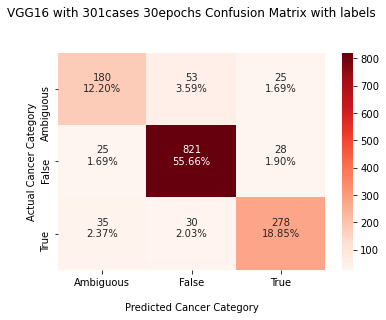

In [17]:
group_counts = ["{0:0.0f}".format(value) for value in
                vgg16_with301cases_cm.flatten()]
                #change to cm
group_percentages = ["{0:.2%}".format(value) for value in
                     vgg16_with301cases_cm.flatten()/np.sum(vgg16_with301cases_cm)]
                     #change to cm                          #change to cm
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(vgg16_with301cases_cm, annot=labels, fmt='', cmap='Reds') 
                 #change to cm
ax.set_title('VGG16 with 301cases 30epochs Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()